In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [133]:
#import chardet

#with open("IDCJDW2801.202408.csv","rb") as file:
#    result = chardet.detect(file.read(10000))
#    print(result)

In [134]:
import os 
folder_path = "archivos"
all_files = os.listdir(folder_path)

dfs = []

first_file = True
for file in all_files:
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path,file)
        if first_file:
            df = pd.read_csv(file_path, encoding="ISO-8859-1", skiprows=6)
            df = df.iloc[:, 1:]

            first_file = False
        else: 
            df=pd.read_csv(file_path, encoding="ISO-8859-1", skiprows=6)
            df = df.iloc[:, 1:]
        dfs.append(df)

combined_df = pd.concat(dfs,ignore_index= True)

combined_df.head(40)


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2024-09-1,9.5,19.0,0.0,NaN,NaN,NW,67.0,13:22,14.7,...,NaN,NW,26,1013.2,17.9,32.0,NaN,WNW,39.0,1010.6
1,2024-09-2,10.4,14.0,0.0,NaN,NaN,WNW,85.0,10:06,10.8,...,8.0,W,56,1009.8,12.0,34.0,8.0,WNW,43.0,1014.6
2,2024-09-3,-0.1,15.9,0.0,NaN,NaN,NW,30.0,14:59,8.0,...,NaN,NW,11,1029.6,15.0,36.0,NaN,NW,19.0,1028.1
3,2024-09-4,-2.5,20.1,0.0,NaN,NaN,NNW,44.0,15:01,6.4,...,NaN,NNW,7,1028.9,18.3,25.0,4.0,NNW,30.0,1023.8
4,2024-09-5,2.4,22.6,0.0,NaN,NaN,NNW,50.0,12:03,15.1,...,NaN,NNW,28,1024.4,22.0,36.0,3.0,NW,35.0,1021.2
5,2024-09-6,9.0,24.4,0.0,NaN,NaN,NW,63.0,10:28,17.2,...,NaN,NW,35,1023.3,23.6,32.0,NaN,NW,35.0,1018.5
6,2024-09-7,13.2,20.2,0.0,NaN,NaN,NNW,44.0,01:26,13.9,...,7.0,NNW,13,1024.1,19.3,41.0,NaN,N,30.0,1021.6
7,2024-09-8,-0.6,17.6,0.0,NaN,NaN,WNW,50.0,13:48,8.9,...,NaN,ENE,6,1021.8,16.3,36.0,NaN,W,35.0,1017.8
8,2024-09-9,8.6,18.6,0.0,NaN,NaN,NW,54.0,14:50,14.6,...,NaN,NNW,20,1017.6,16.2,44.0,NaN,WNW,31.0,1017.3
9,2024-09-10,-0.8,19.9,0.0,NaN,NaN,NNW,22.0,13:34,9.1,...,NaN,SSE,2,1026.2,19.1,32.0,NaN,NNE,11.0,1023.7


In [135]:
np.shape(combined_df)

(177, 21)

In [136]:
combined_df.isnull().sum()


Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     177
Sunshine (hours)                     177
Direction of maximum wind gust         4
Speed of maximum wind gust (km/h)      4
Time of maximum wind gust              4
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)              75
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)              77
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64

In [137]:
columns_drop = ["Evaporation (mm)", "Sunshine (hours)"]


In [138]:
combined_df = combined_df.drop(columns= columns_drop)


In [139]:
combined_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2024-09-1,9.5,19.0,0.0,NW,67.0,13:22,14.7,48,NaN,NW,26,1013.2,17.9,32.0,NaN,WNW,39.0,1010.6
1,2024-09-2,10.4,14.0,0.0,WNW,85.0,10:06,10.8,58,8.0,W,56,1009.8,12.0,34.0,8.0,WNW,43.0,1014.6
2,2024-09-3,-0.1,15.9,0.0,NW,30.0,14:59,8.0,55,NaN,NW,11,1029.6,15.0,36.0,NaN,NW,19.0,1028.1
3,2024-09-4,-2.5,20.1,0.0,NNW,44.0,15:01,6.4,85,NaN,NNW,7,1028.9,18.3,25.0,4.0,NNW,30.0,1023.8
4,2024-09-5,2.4,22.6,0.0,NNW,50.0,12:03,15.1,54,NaN,NNW,28,1024.4,22.0,36.0,3.0,NW,35.0,1021.2


3pm cloud amount (oktas) - Mean: 4.86, Median: 5.0, Std Dev: 2.9164112442271493


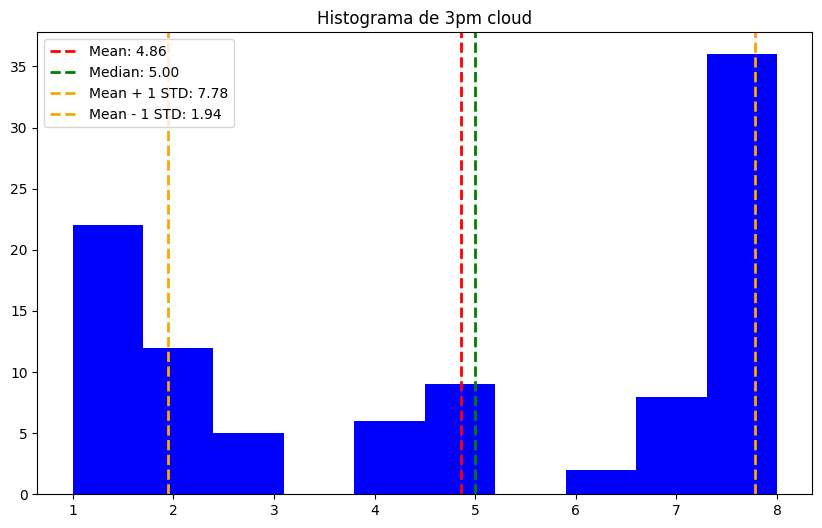

In [140]:
plt.figure(figsize=(10,6))
plt.hist(combined_df["3pm cloud amount (oktas)"], bins=10,color="blue")
plt.title("Histograma de 3pm cloud")

mean_3pm = combined_df["3pm cloud amount (oktas)"].mean()
median_3pm = combined_df["3pm cloud amount (oktas)"].median()
std_3pm = combined_df["3pm cloud amount (oktas)"].std()
print(f"3pm cloud amount (oktas) - Mean: {mean_3pm}, Median: {median_3pm}, Std Dev: {std_3pm}")

plt.axvline(mean_3pm, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_3pm:.2f}')
plt.axvline(median_3pm, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_3pm:.2f}')
plt.axvline(mean_3pm + std_3pm, color='orange', linestyle='dashed', linewidth=2, label=f'Mean + 1 STD: {mean_3pm + std_3pm:.2f}')
plt.axvline(mean_3pm - std_3pm, color='orange', linestyle='dashed', linewidth=2, label=f'Mean - 1 STD: {mean_3pm - std_3pm:.2f}')

plt.legend()

plt.show()


9am cloud amount (oktas) - Mean: 5.715686274509804, Median: 7.0, Std Dev: 2.7118275996649928


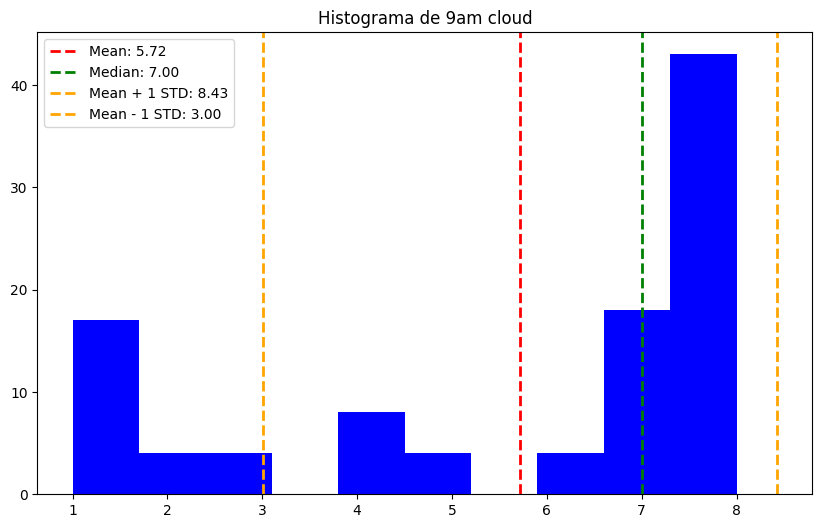

In [141]:
plt.figure(figsize=(10,6))
plt.hist(combined_df["9am cloud amount (oktas)"], bins=10,color="blue")
plt.title("Histograma de 9am cloud")


# Estadísticas para la columna "9am cloud amount (oktas)"
mean_9am = combined_df["9am cloud amount (oktas)"].mean()
median_9am = combined_df["9am cloud amount (oktas)"].median()
std_9am = combined_df["9am cloud amount (oktas)"].std()

# Imprime los resultados
print(f"9am cloud amount (oktas) - Mean: {mean_9am}, Median: {median_9am}, Std Dev: {std_9am}")

plt.axvline(mean_9am, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_9am:.2f}')
plt.axvline(median_9am, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_9am:.2f}')
plt.axvline(mean_9am + std_9am, color='orange', linestyle='dashed', linewidth=2, label=f'Mean + 1 STD: {mean_9am + std_9am:.2f}')
plt.axvline(mean_9am - std_9am, color='orange', linestyle='dashed', linewidth=2, label=f'Mean - 1 STD: {mean_9am - std_9am:.2f}')

plt.legend()

plt.show()

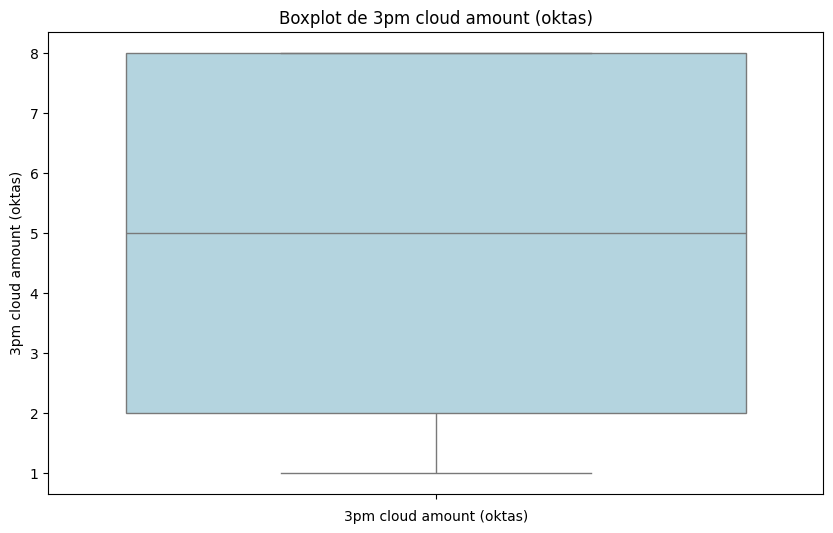

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=combined_df["3pm cloud amount (oktas)"], color='lightblue')

# Título y etiquetas
plt.title("Boxplot de 3pm cloud amount (oktas)")
plt.xlabel("3pm cloud amount (oktas)")

# Mostrar el gráfico
plt.show()


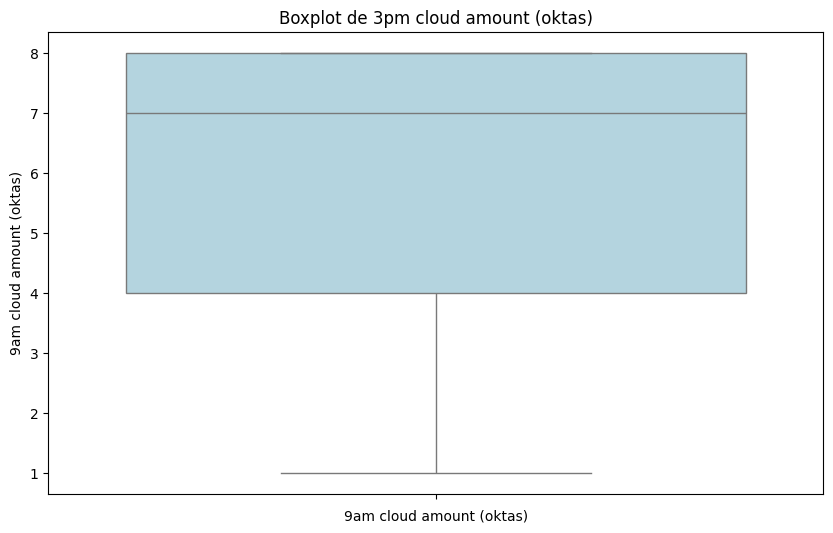

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=combined_df["9am cloud amount (oktas)"], color='lightblue')

# Título y etiquetas
plt.title("Boxplot de 3pm cloud amount (oktas)")
plt.xlabel("9am cloud amount (oktas)")

# Mostrar el gráfico
plt.show()


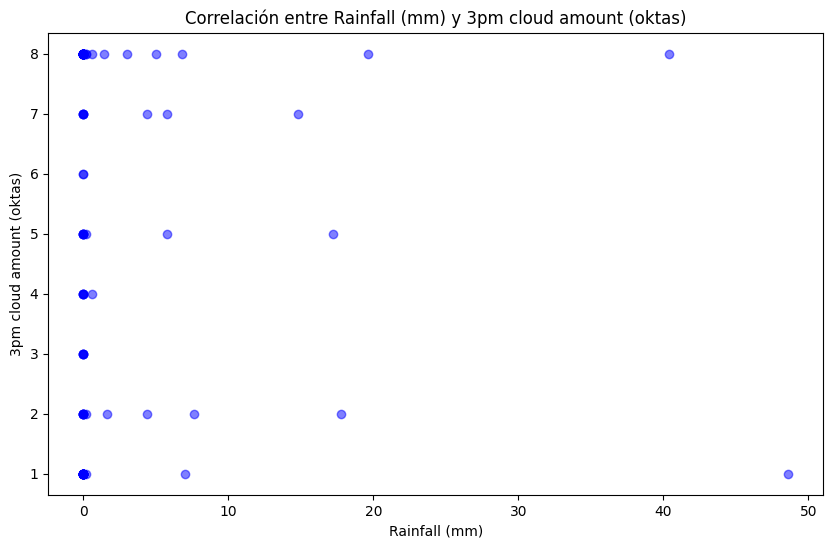

In [144]:
# Crear un gráfico de dispersión entre Rainfall y 3pm cloud amount
plt.figure(figsize=(10, 6))
plt.scatter(combined_df["Rainfall (mm)"], combined_df["3pm cloud amount (oktas)"], alpha=0.5, color="blue")
plt.title("Correlación entre Rainfall (mm) y 3pm cloud amount (oktas)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("3pm cloud amount (oktas)")
plt.show()


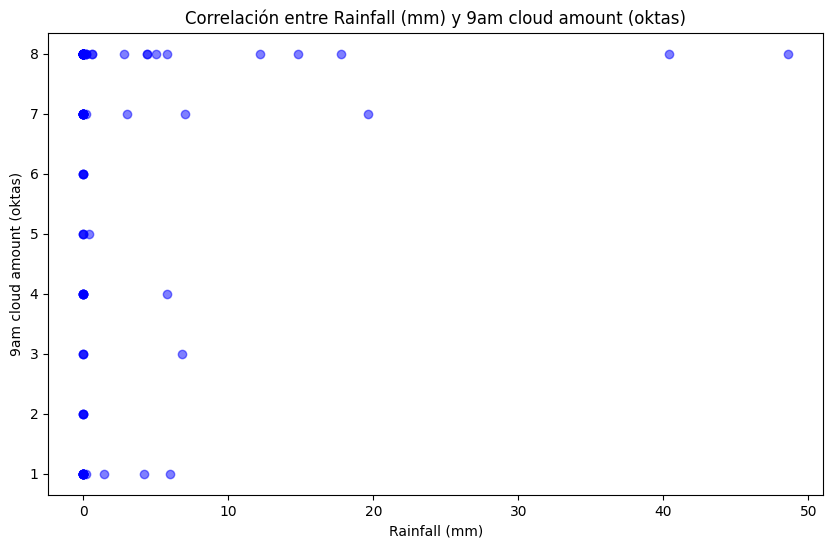

In [145]:
# Crear un gráfico de dispersión entre Rainfall y 3pm cloud amount
plt.figure(figsize=(10, 6))
plt.scatter(combined_df["Rainfall (mm)"], combined_df["9am cloud amount (oktas)"], alpha=0.5, color="blue")
plt.title("Correlación entre Rainfall (mm) y 9am cloud amount (oktas)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("9am cloud amount (oktas)")
plt.show()


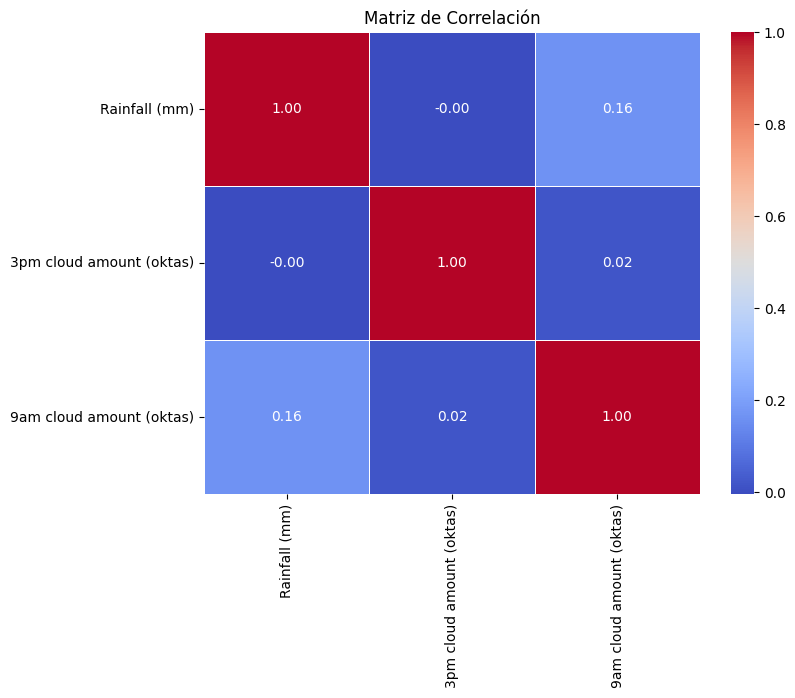

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación para las columnas que te interesan
correlation_matrix = combined_df[["Rainfall (mm)", "3pm cloud amount (oktas)", "9am cloud amount (oktas)"]].corr()

# Crea un heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [147]:
correlation_value = combined_df["Rainfall (mm)"].corr(combined_df["3pm cloud amount (oktas)"])
print(f"Correlación entre Rainfall (mm) y 3pm cloud amount (oktas): {correlation_value}")


Correlación entre Rainfall (mm) y 3pm cloud amount (oktas): -0.003453671226289017


In [148]:
combined_df = combined_df.drop(columns="3pm cloud amount (oktas)")

In [149]:
combined_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2024-09-1,9.5,19.0,0.0,NW,67.0,13:22,14.7,48,NaN,NW,26,1013.2,17.9,32.0,WNW,39.0,1010.6
1,2024-09-2,10.4,14.0,0.0,WNW,85.0,10:06,10.8,58,8.0,W,56,1009.8,12.0,34.0,WNW,43.0,1014.6
2,2024-09-3,-0.1,15.9,0.0,NW,30.0,14:59,8.0,55,NaN,NW,11,1029.6,15.0,36.0,NW,19.0,1028.1
3,2024-09-4,-2.5,20.1,0.0,NNW,44.0,15:01,6.4,85,NaN,NNW,7,1028.9,18.3,25.0,NNW,30.0,1023.8
4,2024-09-5,2.4,22.6,0.0,NNW,50.0,12:03,15.1,54,NaN,NNW,28,1024.4,22.0,36.0,NW,35.0,1021.2


In [150]:
import pandas as pd

# Obtener la suma de valores nulos y los tipos de datos
null_values = combined_df.isnull().sum()
data_types = combined_df.dtypes

# Combinar los dos en un solo DataFrame
summary_df = pd.DataFrame({
    'Missing Values': null_values,
    'Data Types': data_types
})

# Imprimir el DataFrame
print(summary_df)


                                   Missing Values Data Types
Date                                            0     object
Minimum temperature (°C)                        0    float64
Maximum temperature (°C)                        1    float64
Rainfall (mm)                                   0    float64
Direction of maximum wind gust                  4     object
Speed of maximum wind gust (km/h)               4    float64
Time of maximum wind gust                       4     object
9am Temperature (°C)                            0    float64
9am relative humidity (%)                       0      int64
9am cloud amount (oktas)                       75    float64
9am wind direction                              0     object
9am wind speed (km/h)                           0     object
9am MSL pressure (hPa)                          0    float64
3pm Temperature (°C)                            1    float64
3pm relative humidity (%)                       1    float64
3pm wind direction      

In [151]:
combined_df["9am wind speed (km/h)"] = pd.to_numeric(combined_df["9am wind speed (km/h)"], errors="coerce")


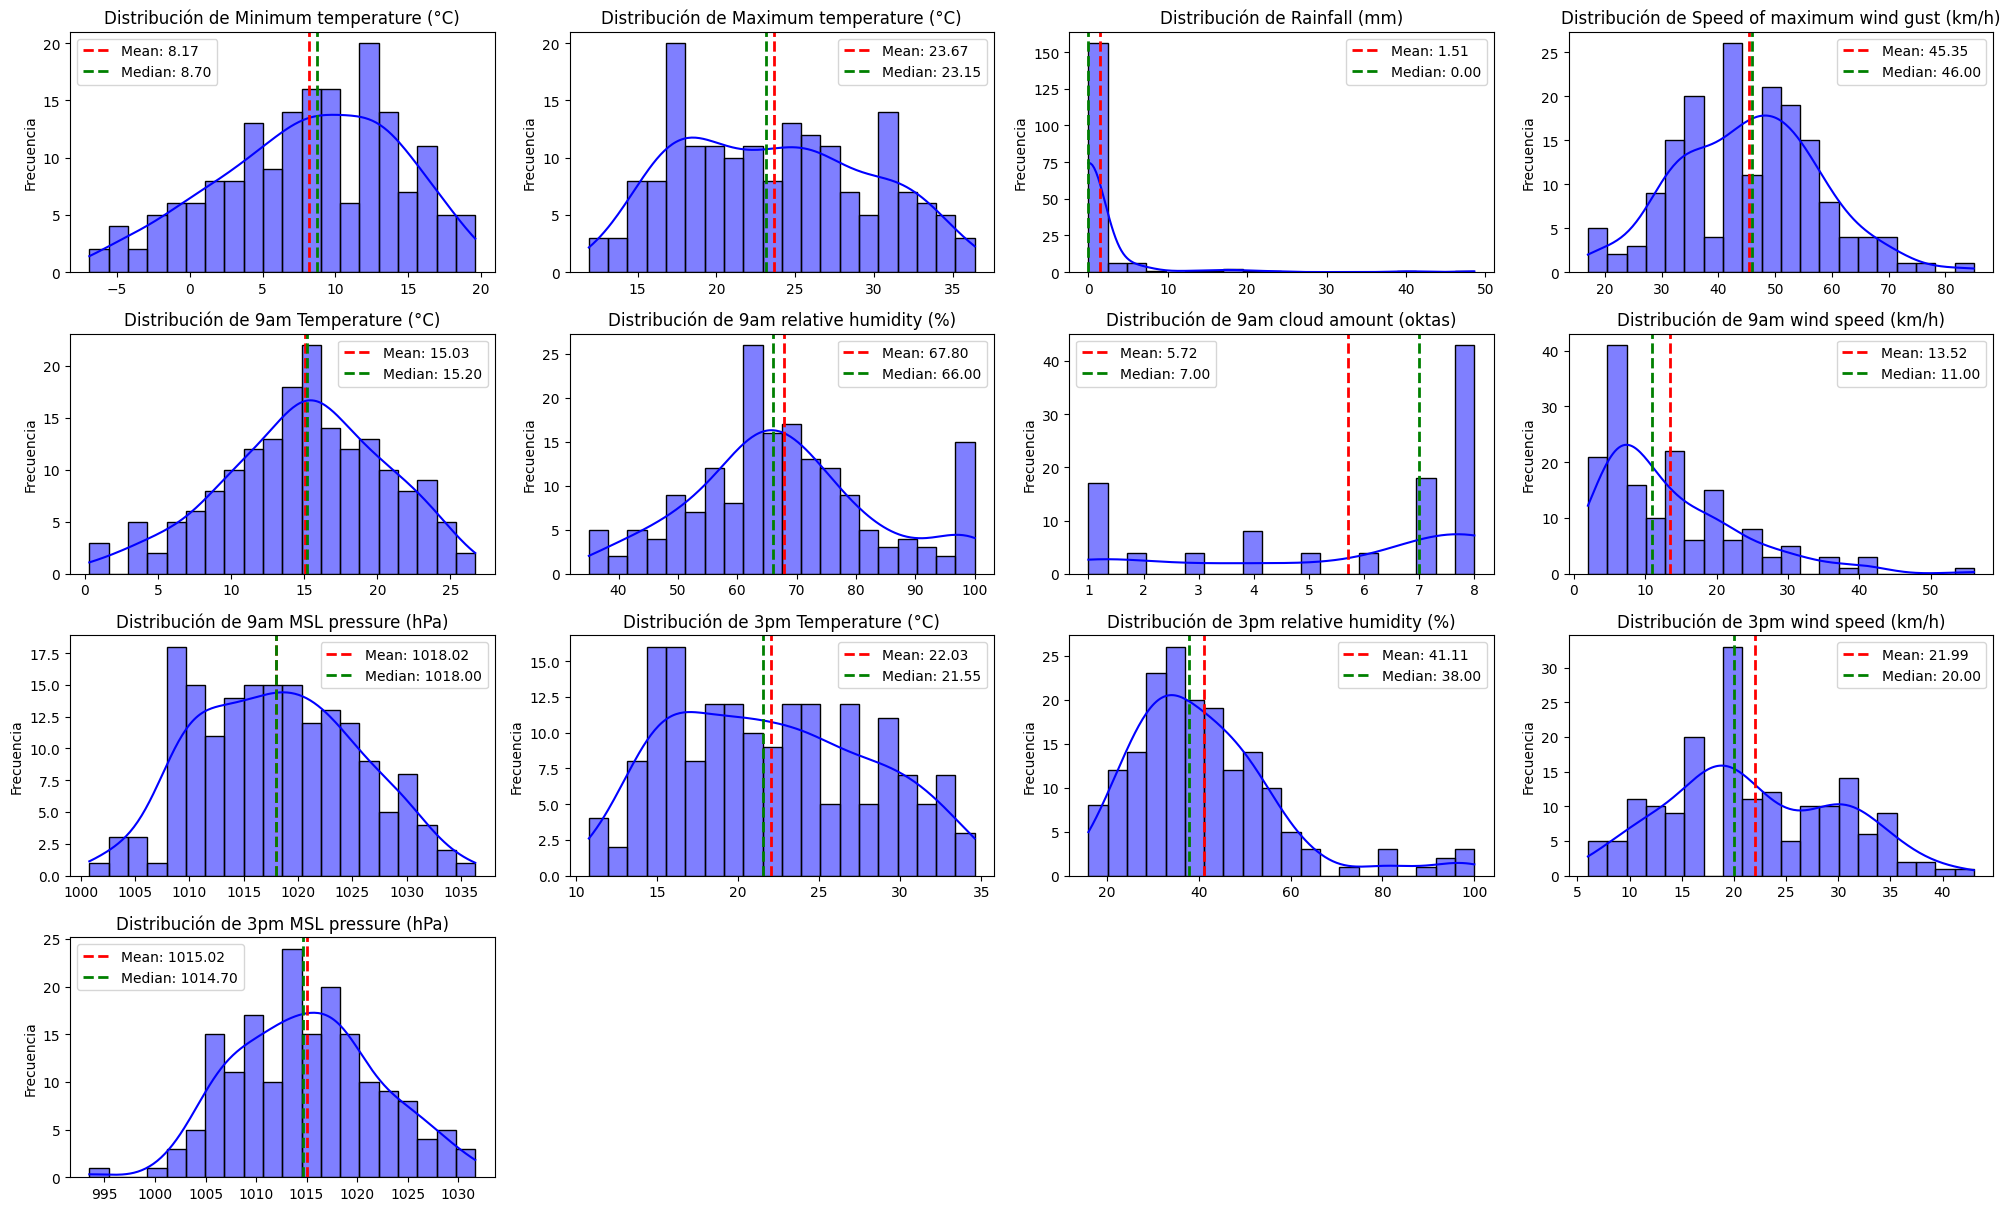

In [152]:


# Excluir la columna 'Date' (suponiendo que sea un DataFrame de Pandas)
columns_to_plot = combined_df.select_dtypes(include=[np.number]).columns  # Solo numéricas

# Crear figura con subgráficos
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre las columnas numéricas
for i, col in enumerate(columns_to_plot):
    if combined_df[col].isnull().all():
        continue  # Omitir si la columna es completamente NaN

    sns.histplot(combined_df[col].dropna(), bins=20, kde=True, ax=axes[i], color="blue")

    mean = combined_df[col].mean()
    median = combined_df[col].median()
    
    axes[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].legend()

# Eliminar ejes vacíos si hay menos de 20 columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()


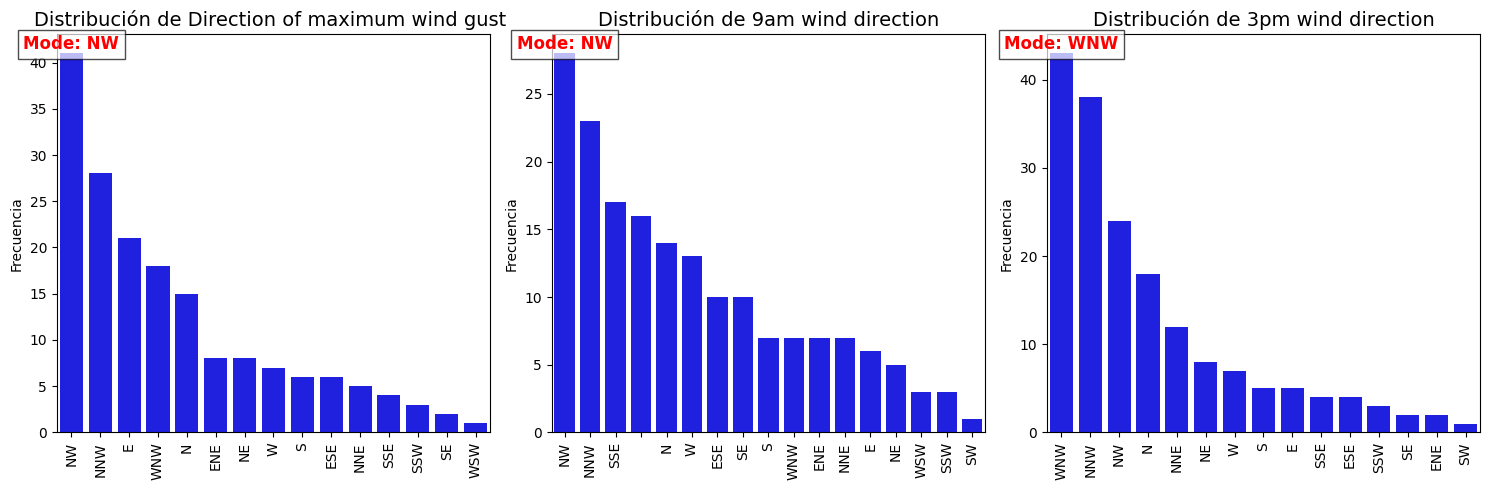

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar solo las columnas categóricas, excluyendo 'Date'
categorical_columns = combined_df.select_dtypes(exclude=[np.number]).columns
categorical_columns = [col for col in categorical_columns if col not in ['Date', 'Time of maximum wind gust']]  # Excluir 'Date'

# Determinar la cantidad de filas y columnas dinámicamente
num_categories = len(categorical_columns)
cols = 3  # Número de columnas fijas
rows = (num_categories // cols) + (num_categories % cols > 0)  # Ajustar filas según datos

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()

# Iterar sobre las columnas categóricas
for i, col in enumerate(categorical_columns):
    if combined_df[col].isnull().all():
        continue  # Omitir columnas completamente vacías

    # Contar frecuencia de cada categoría
    value_counts = combined_df[col].value_counts()

    # Crear gráfico de barras
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], color="blue")

    # Calcular la moda
    mode_value = combined_df[col].mode()[0]

    # Agregar anotación con la moda
    axes[i].text(
        x=value_counts.index.get_loc(mode_value), 
        y=value_counts.max(), 
        s=f'Mode: {mode_value}', 
        color='red', fontsize=12, fontweight='bold', 
        ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7)
    )

    axes[i].set_title(f"Distribución de {col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    
    # Rotar etiquetas si hay muchas categorías
    if len(value_counts) > 5:
        axes[i].tick_params(axis='x', rotation=90)

# Eliminar ejes vacíos si hay menos de la cantidad total de subgráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar sobreposición
plt.tight_layout()
plt.show()


In [154]:
from sklearn.impute import SimpleImputer

# Dividir las columnas en numéricas y categóricas
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = combined_df.select_dtypes(include=['object']).columns

# Excluir '9am cloud amount (oktas)' de las columnas numéricas y categóricas
numeric_columns = [col for col in numeric_columns if col != '9am cloud amount (oktas)']
categorical_columns = [col for col in categorical_columns if col != '9am cloud amount (oktas)']

# Crear el imputador para columnas numéricas (usando la mediana)
numeric_imputer = SimpleImputer(strategy='median')

# Crear el imputador para columnas categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Imputar los valores en las columnas numéricas
combined_df[numeric_columns] = numeric_imputer.fit_transform(combined_df[numeric_columns])

# Imputar los valores en las columnas categóricas
combined_df[categorical_columns] = categorical_imputer.fit_transform(combined_df[categorical_columns])

# Ver el resultado
print(combined_df.isnull().sum())  # Verificar que los valores nulos se han imputado, excepto '9am cloud amount (oktas)'


Date                                  0
Minimum temperature (°C)              0
Maximum temperature (°C)              0
Rainfall (mm)                         0
Direction of maximum wind gust        0
Speed of maximum wind gust (km/h)     0
Time of maximum wind gust             0
9am Temperature (°C)                  0
9am relative humidity (%)             0
9am cloud amount (oktas)             75
9am wind direction                    0
9am wind speed (km/h)                 0
9am MSL pressure (hPa)                0
3pm Temperature (°C)                  0
3pm relative humidity (%)             0
3pm wind direction                    0
3pm wind speed (km/h)                 0
3pm MSL pressure (hPa)                0
dtype: int64
